# Project 2: Movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project we will analysis movies data.

> in particular, we will be intrested in _Budget_, _Revenue_, _Vote Average_, _Release Year_ and _Release Date_, we have 4 research question that we will discusses during this project, 

> we choose the independent attribute's as:
  <ul>
  <li>Vote Average</li>
  <li>Release Year</li>
  <li>Release Date</li>
  <li>Revenue</li>
  </ul>
  
> we choose the dependent attribute's as:
  <ul>
  <li>Budget</li>
  </ul>

### Research Questions:
  <ul>
  <li><a href="#q1">Does spending more Budget increase the chance of getting high Vote Average ?</a></li>
  <li><a href="#q2">Does the cost of producing a movie is getting higher over the years ? </a></li>
  <li><a href="#q3">Does the producing of movie is getting higher over the years ?</a></li>
  <li><a href="#q4">Does the summer movies gets more revenues than the other seasons movies in average ?</a></li>
  </ul>

In [39]:
# Frist importing the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for matplotlib, my jupyter version doesn't support the space for the magic function 
# keep sure to include the space if you need
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

> Loading the data and printing out a few lines.

In [40]:
# Loading the data
df = pd.read_csv('tmdb-movies.csv')
# printing out a few lines.
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Data Cleaning

> **First we will drop all the columns that we don't need them in our analytics**

> After discussing the structure of the data and any problems that need to be
  cleaned, perform those cleaning steps in the second part of this section.

In [41]:
# Selecting the columns that we would drop
dropped_columns = ['id', 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'overview', 'original_title',
                  'keywords', 'production_companies']
# Dropping the columns
df.drop(dropped_columns, axis = 1, inplace = True)
df.head()

,popularity,budget,revenue,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [42]:
df.shape

(10866, 11)

> **Now we will check for any missing values**

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
popularity      10866 non-null float64
budget          10866 non-null int64
revenue         10866 non-null int64
runtime         10866 non-null int64
genres          10843 non-null object
release_date    10866 non-null object
vote_count      10866 non-null int64
vote_average    10866 non-null float64
release_year    10866 non-null int64
budget_adj      10866 non-null float64
revenue_adj     10866 non-null float64
dtypes: float64(4), int64(5), object(2)
memory usage: 933.9+ KB


> **Looks like we have only 23 rows that has null values, since it's a few rows, we weill just drop them**

In [44]:
# Dropping the rows that contains "Null values" by index
df.drop(index = df[df['genres'].isnull() == True].index, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 11 columns):
popularity      10843 non-null float64
budget          10843 non-null int64
revenue         10843 non-null int64
runtime         10843 non-null int64
genres          10843 non-null object
release_date    10843 non-null object
vote_count      10843 non-null int64
vote_average    10843 non-null float64
release_year    10843 non-null int64
budget_adj      10843 non-null float64
revenue_adj     10843 non-null float64
dtypes: float64(4), int64(5), object(2)
memory usage: 1016.5+ KB


> **Now lets check the statistics for the Dataset**

In [45]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10843.000000,1.084300e+04,1.084300e+04,10843.000000,10843.000000,10843.000000,10843.000000,1.084300e+04,1.084300e+04
mean,0.647456,1.465672e+07,3.990779e+07,102.137508,217.813705,5.973974,2001.315595,1.758827e+07,5.147332e+07
std,1.000986,3.093864e+07,1.171131e+08,31.293320,576.155351,0.934260,12.813298,3.433299e+07,1.447664e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.208253,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.384555,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.715349,1.500000e+07,2.413675e+07,111.000000,146.000000,6.600000,2011.000000,2.093530e+07,3.387655e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> **Looks like we have some _Zero_ values in _Budget_, _Revenue_ and _Run Time_ over 50% of the Dataset**

> We will drop the rows that has zero in _Budget_ and _Revenue_, becouse we can't just fill it with mean, it's a row has no
  usefull for us, forethere more the Zero's rows is more than 40%.
  
> For the _Run Time_ we will just leave it, because our research questions doesn't care much about that column.

In [46]:
# Checking how many rows that has zero in Budget and Revenue
df[(df['budget'] == 0) & (df['revenue'] == 0)].shape

(4679, 11)

In [47]:
# Dropping the rows that contains "Zero" in both Budget and Revenue by index
df.drop(df[(df['budget'] == 0) & (df['revenue'] == 0)].index, inplace = True)
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,6164.000000,6.164000e+03,6.164000e+03,6164.000000,6164.000000,6164.000000,6164.000000,6.164000e+03,6.164000e+03
mean,0.909458,2.578242e+07,7.020120e+07,106.457333,355.957333,6.039487,2000.990753,3.093926e+07,9.054594e+07
std,1.240841,3.737671e+07,1.483287e+08,23.152051,733.213580,0.871805,11.911298,4.074969e+07,1.825647e+08
min,0.001117,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.322289,1.700000e+06,1.192930e+05,93.000000,31.000000,5.500000,1994.000000,2.374361e+06,1.162947e+05
50%,0.570544,1.200000e+07,1.655209e+07,102.000000,96.000000,6.100000,2004.000000,1.622504e+07,2.334080e+07
75%,1.050621,3.300000e+07,7.145220e+07,116.000000,324.000000,6.600000,2010.000000,4.206450e+07,9.528597e+07
max,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis

<a id='q1'></a>
### Research Question 1: Does spending more Budget increase the chance of getting high Vote Average ?

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6164 entries, 0 to 10865
Data columns (total 11 columns):
popularity      6164 non-null float64
budget          6164 non-null int64
revenue         6164 non-null int64
runtime         6164 non-null int64
genres          6164 non-null object
release_date    6164 non-null object
vote_count      6164 non-null int64
vote_average    6164 non-null float64
release_year    6164 non-null int64
budget_adj      6164 non-null float64
revenue_adj     6164 non-null float64
dtypes: float64(4), int64(5), object(2)
memory usage: 577.9+ KB


> **Since *vote_average* is float, we have to use *sort_values* method to create a plot.**

> as we build the plot we will put x-axis as *vote_average*, y-axis as *budget* and Scatter for the plot kind .

> next, we will set the labes and the title with suitable names.

> last, replace y-axis with more values so the plot looks better.

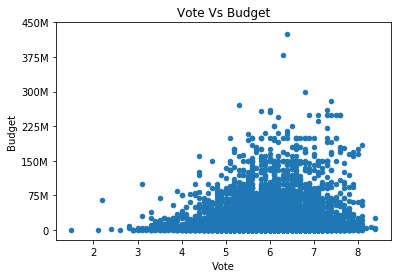

In [49]:
# making the plot
df.sort_values('vote_average').plot(x = 'vote_average', y = 'budget', kind = 'scatter')

# setting the title
plt.title('Vote Vs Budget')

# setting the label for x-axis
plt.xlabel('Vote')

# setting the label for y-axis
plt.ylabel('Budget')

# making an array of values for y-ticks using numpy's "arange" function
yticks = np.arange(0, 525000000, step = 75000000)

# setting the array and the names 
plt.yticks(yticks, [0, '75M', '150M', '225M', '300M', '375M', '450M'])

plt.show();

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

<a id='q2'></a>
### Research Question 2: Does the cost of producing a movie is getting higher over the years ?

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6164 entries, 0 to 10865
Data columns (total 11 columns):
popularity      6164 non-null float64
budget          6164 non-null int64
revenue         6164 non-null int64
runtime         6164 non-null int64
genres          6164 non-null object
release_date    6164 non-null object
vote_count      6164 non-null int64
vote_average    6164 non-null float64
release_year    6164 non-null int64
budget_adj      6164 non-null float64
revenue_adj     6164 non-null float64
dtypes: float64(4), int64(5), object(2)
memory usage: 577.9+ KB


> **First let's change *release_year* to int**

In [51]:
# changing the columns type to int
df['release_year'] = df['release_year'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6164 entries, 0 to 10865
Data columns (total 11 columns):
popularity      6164 non-null float64
budget          6164 non-null int64
revenue         6164 non-null int64
runtime         6164 non-null int64
genres          6164 non-null object
release_date    6164 non-null object
vote_count      6164 non-null int64
vote_average    6164 non-null float64
release_year    6164 non-null int32
budget_adj      6164 non-null float64
revenue_adj     6164 non-null float64
dtypes: float64(4), int32(1), int64(4), object(2)
memory usage: 553.8+ KB


> for this plot we will use *sort_values* method as well, put x-axis as *release_year*, y-axis as *budget* and the kind of the plot left as default.

> next, we will set the labes and the title with suitable names.

> last, replace x- axis and y-axis with more values so the plot looks better.

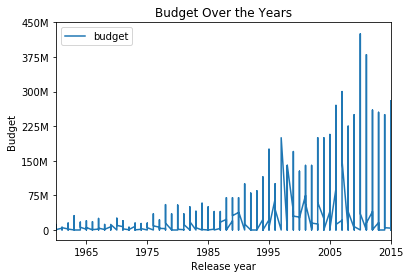

In [52]:
# making the plot
plt.plot = df.sort_values('release_year').plot(x = 'release_year', y = 'budget')

# setting the title
plt.title('Budget Over the Years')

# setting the label for x-axis
plt.xlabel('Release year');

# setting the label for y-axis
plt.ylabel('Budget');

# making an array of values for x-ticks using numpy's "arange" function
xticks = np.arange(1965, 2025, step = 10)

# making an array of values for y-ticks using numpy's "arange" function
yticks = np.arange(0, 525000000, step = 75000000)

# setting the x-ticks
plt.xticks(xticks)

# setting the y-ticks and the names 
plt.yticks(yticks, [0, '75M', '150M', '225M', '300M', '375M', '450M'])

plt.show();

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

<a id='q3'></a>
### Research Question 3: Does the producing of movie is getting higher over the years ?

> For this question we don't need much code.

> just building a plot from *release_year* columns directly.

> then, we will set the labes and the title with suitable names.

> last, replace x- axis only  with more values since y-axis is representing very well.

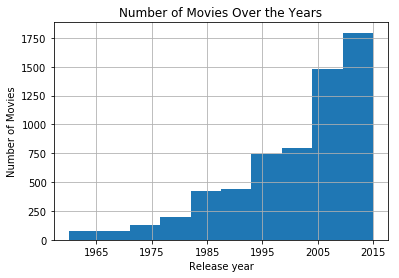

In [53]:
# making the plot
plt.plot = df.release_year.hist()

# setting the title
plt.title('Number of Movies Over the Years')

# setting the label for x-axis
plt.xlabel('Release year');

# setting the label for y-axis
plt.ylabel('Number of Movies');

# making an array of values for x-ticks using numpy's "arange" function
xticks = np.arange(1965, 2025, step = 10)

# setting the x-ticks
plt.xticks(xticks)

plt.show();

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

<a id='q4'></a>
### Research Question 4: Does the summer movies gets more revenues than the other seasons in average ?

In [54]:
df.head()

,popularity,budget,revenue,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> the *release_date* format is mm/dd/yyyy, so first we have to split the month.

> for that we will have a copy of the dataset.

In [55]:
# making a copy
months = df.copy()

> then we will split the column, by using apply method.

> since we care only about the months, we will just save the month and drop the rest.

In [56]:
# spliting the months from "release_date" column
months['release_date'] = df['release_date'].apply(lambda x: x.split("/")[0])

> checking the copy 

In [57]:
months.head()

,popularity,budget,revenue,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,124,Action|Adventure|Science Fiction|Thriller,6,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,120,Action|Adventure|Science Fiction|Thriller,5,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,119,Adventure|Science Fiction|Thriller,3,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,136,Action|Adventure|Science Fiction|Fantasy,12,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,137,Action|Crime|Thriller,4,2947,7.3,2015,1.747999e+08,1.385749e+09


In [58]:
months.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6164 entries, 0 to 10865
Data columns (total 11 columns):
popularity      6164 non-null float64
budget          6164 non-null int64
revenue         6164 non-null int64
runtime         6164 non-null int64
genres          6164 non-null object
release_date    6164 non-null object
vote_count      6164 non-null int64
vote_average    6164 non-null float64
release_year    6164 non-null int32
budget_adj      6164 non-null float64
revenue_adj     6164 non-null float64
dtypes: float64(4), int32(1), int64(4), object(2)
memory usage: 553.8+ KB


> changing the *release_date* type from string to int, so the handling would be easier.

In [59]:
# changing release_date column type for the copy
months['release_date'].astype(int, inplace = True)
months.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6164 entries, 0 to 10865
Data columns (total 11 columns):
popularity      6164 non-null float64
budget          6164 non-null int64
revenue         6164 non-null int64
runtime         6164 non-null int64
genres          6164 non-null object
release_date    6164 non-null object
vote_count      6164 non-null int64
vote_average    6164 non-null float64
release_year    6164 non-null int32
budget_adj      6164 non-null float64
revenue_adj     6164 non-null float64
dtypes: float64(4), int32(1), int64(4), object(2)
memory usage: 553.8+ KB


> Now, we'er going to make 2 more dataframes, one for the summer movies, and and one for the other seasons.

> First the summer movies, and the summer considered as july, august and september (7, 8, 9).

In [60]:
# selecting only the summer months (7, 8, 9)
summer = months[(months['release_date'] == '7') | (months['release_date'] == '8') | (months['release_date'] == '9')]
summer.head()

,popularity,budget,revenue,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
7,7.667400,108000000,595380321,141,Drama|Adventure|Science Fiction,9,4572,7.6,2015,9.935996e+07,5.477497e+08
13,5.984995,88000000,243637091,105,Action|Comedy|Science Fiction,7,1575,5.8,2015,8.095996e+07,2.241460e+08
17,5.573184,130000000,518602163,115,Science Fiction|Action|Adventure,7,3779,7.0,2015,1.195999e+08,4.771138e+08
25,4.566713,150000000,682330139,131,Action,7,2349,7.1,2015,1.379999e+08,6.277435e+08
29,3.968891,61000000,311256926,132,Action|Science Fiction|Thriller,9,1849,6.4,2015,5.611998e+07,2.863562e+08


> making the other dataframe.

In [61]:
# selecting all the months except summer months
all_seasons = months[(months['release_date'] != '7') & (months['release_date'] != '8') & (months['release_date'] != '9')]
all_seasons.head()

,popularity,budget,revenue,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,124,Action|Adventure|Science Fiction|Thriller,6,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,120,Action|Adventure|Science Fiction|Thriller,5,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,119,Adventure|Science Fiction|Thriller,3,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,136,Action|Adventure|Science Fiction|Fantasy,12,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,137,Action|Crime|Thriller,4,2947,7.3,2015,1.747999e+08,1.385749e+09


> Finally, the plot would kind of bar,

> the values is the mean of each DF.

> setting the suitable labels

> and replacing the y-axis with more values 

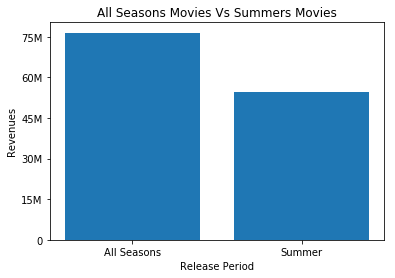

In [62]:
# making names for the bars 
names = ['All Seasons', 'Summer']

# making values for the bars 
values = [all_seasons['revenue'].mean(), summer['revenue'].mean()]

# making the plot
plt.bar(names, values)

# setting the plot title
plt.title('All Seasons Movies Vs Summers Movies')

# setting the label for x-axis
plt.xlabel('Release Period')

# setting the label for y-axis
plt.ylabel('Revenues')

# making an array of values for y-ticks using numpy's "arange" function
yticks = np.arange(0, 90000000, step = 15000000)
# setting the y-ticks and the names 
plt.yticks(yticks, ['0', '15M', '30M', '45M', '60M', '75M'])


plt.show();

<a id='conclusions'></a>
## Conclusions

> in Conclusion we have got the answers tha we were looking for from our analytics, we will discusses eace one individually. 

## Limitations:
> During this project i had some issues in cleaning the data and visualizations, in the beginning i was filling some rows with wrong values without notice that, so the visualziations was terrible, and i didn't know why, then i discovered that the cleaning wasn't good enough, so i learned that every step of analysing is built top of another.

## Questions Answers:

### Question 1/ Does spending more Budget increase the chance of getting high Vote Average ?

> the plot looks little a bit skewed left bell, so the answer is:
  Yes, the chance of getting higher vote average has increaced.



### Question 2/ Does the cost of producing a movie is getting higher over the years ?

> the plot looks skewed left, so the answer is:
  Yes, the cost of producing a movie is getting higher, but the last few years has droped a little bit.



### Question 3/ Does the producing of movie is getting higher over the years ?

> the plot looks skewed left perfectly, so the answer is:
  Yes, the producing of movie is getting higher over the years.


### Question 4/ Does the summer movies gets more revenues than the other seasons movies in average ?

> the bars shows that the average of the all seasons movies is higher than the summer movies, so the answer is:
  No,  the summer movies doesn't get more revenues than the other seasons movies in average.